In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/survey-ccds-decam-dr9.fits.gz'
ccd_columns = ['expnum', 'ccdname', 'filter', 'ccd_cuts', 'ra_bore', 'dec_bore']

dr9 = Table(fitsio.read(surveyccd_path, columns=ccd_columns))
print(len(dr9))
mask = dr9['ccd_cuts']==0
dr9 = dr9[mask]
print(len(dr9))
print(len(np.unique(dr9['expnum'])))

6388338
4892885
81011


In [4]:
surveyccd_path = '/global/project/projectdirs/cosmo/data/legacysurvey/dr8/survey-ccds-decam-dr8.fits.gz'
ccd_columns = ['expnum', 'ccdname', 'filter', 'ccd_cuts', 'ra_bore', 'dec_bore']

dr8 = Table(fitsio.read(surveyccd_path, columns=ccd_columns))
print(len(dr8))
mask = dr8['ccd_cuts']==0
dr8 = dr8[mask]
print(len(dr8))
print(len(np.unique(dr8['expnum'])))

8675339
3913907
64830


In [7]:
# Select unique exposures

dr9.sort('expnum')
mask = np.concatenate([[True], np.diff(dr9['expnum'])!=0])
dr9 = dr9[mask]
print(len(dr9))

dr8.sort('expnum')
mask = np.concatenate([[True], np.diff(dr8['expnum'])!=0])
dr8 = dr8[mask]
print(len(dr8))

81011
64830


In [8]:
print(dr8['dec_bore'].min())
print(dr9['dec_bore'].min())

-67.1852222222
-67.3557


In [9]:
# # Plot all three bands

# plt.figure(figsize=(25, 12))
# plt.plot(dr9['ra_bore'], dr9['dec_bore'], '.', ms=3, alpha=0.2)
# plt.title('DR9 exposures')
# plt.xlabel('RA')
# plt.ylabel('DEC')
# plt.axis([360, 0, -70, 40])
# plt.grid(alpha=0.5)
# plt.show()

# plt.figure(figsize=(25, 12))
# plt.plot(dr8['ra_bore'], dr8['dec_bore'], '.', ms=3, alpha=0.2)
# plt.title('DR8 exposures')
# plt.xlabel('RA')
# plt.ylabel('DEC')
# plt.axis([360, 0, -70, 40])
# plt.grid(alpha=0.5)
# plt.show()

# mask = np.in1d(dr9['expnum'], dr8['expnum'])
# plt.figure(figsize=(25, 12))
# plt.plot(dr9['ra_bore'][mask], dr9['dec_bore'][mask], '.', ms=3, alpha=0.2)
# plt.title('Exposures in both DR8 and DR9')
# plt.xlabel('RA')
# plt.ylabel('DEC')
# plt.axis([360, 0, -70, 40])
# plt.grid(alpha=0.5)
# plt.show()

# mask = ~np.in1d(dr9['expnum'], dr8['expnum'])
# plt.figure(figsize=(25, 12))
# plt.plot(dr9['ra_bore'][mask], dr9['dec_bore'][mask], '.', ms=3, alpha=0.2)
# plt.title('DR9 exposures not in DR8')
# plt.xlabel('RA')
# plt.ylabel('DEC')
# plt.axis([360, 0, -70, 40])
# plt.grid(alpha=0.5)
# plt.show()

# mask = ~np.in1d(dr8['expnum'], dr9['expnum'])
# plt.figure(figsize=(25, 12))
# plt.plot(dr8['ra_bore'][mask], dr8['dec_bore'][mask], '.', ms=3, alpha=0.2)
# plt.title('DR8 exposures not in DR9')
# plt.xlabel('RA')
# plt.ylabel('DEC')
# plt.axis([360, 0, -70, 40])
# plt.grid(alpha=0.5)
# plt.show()

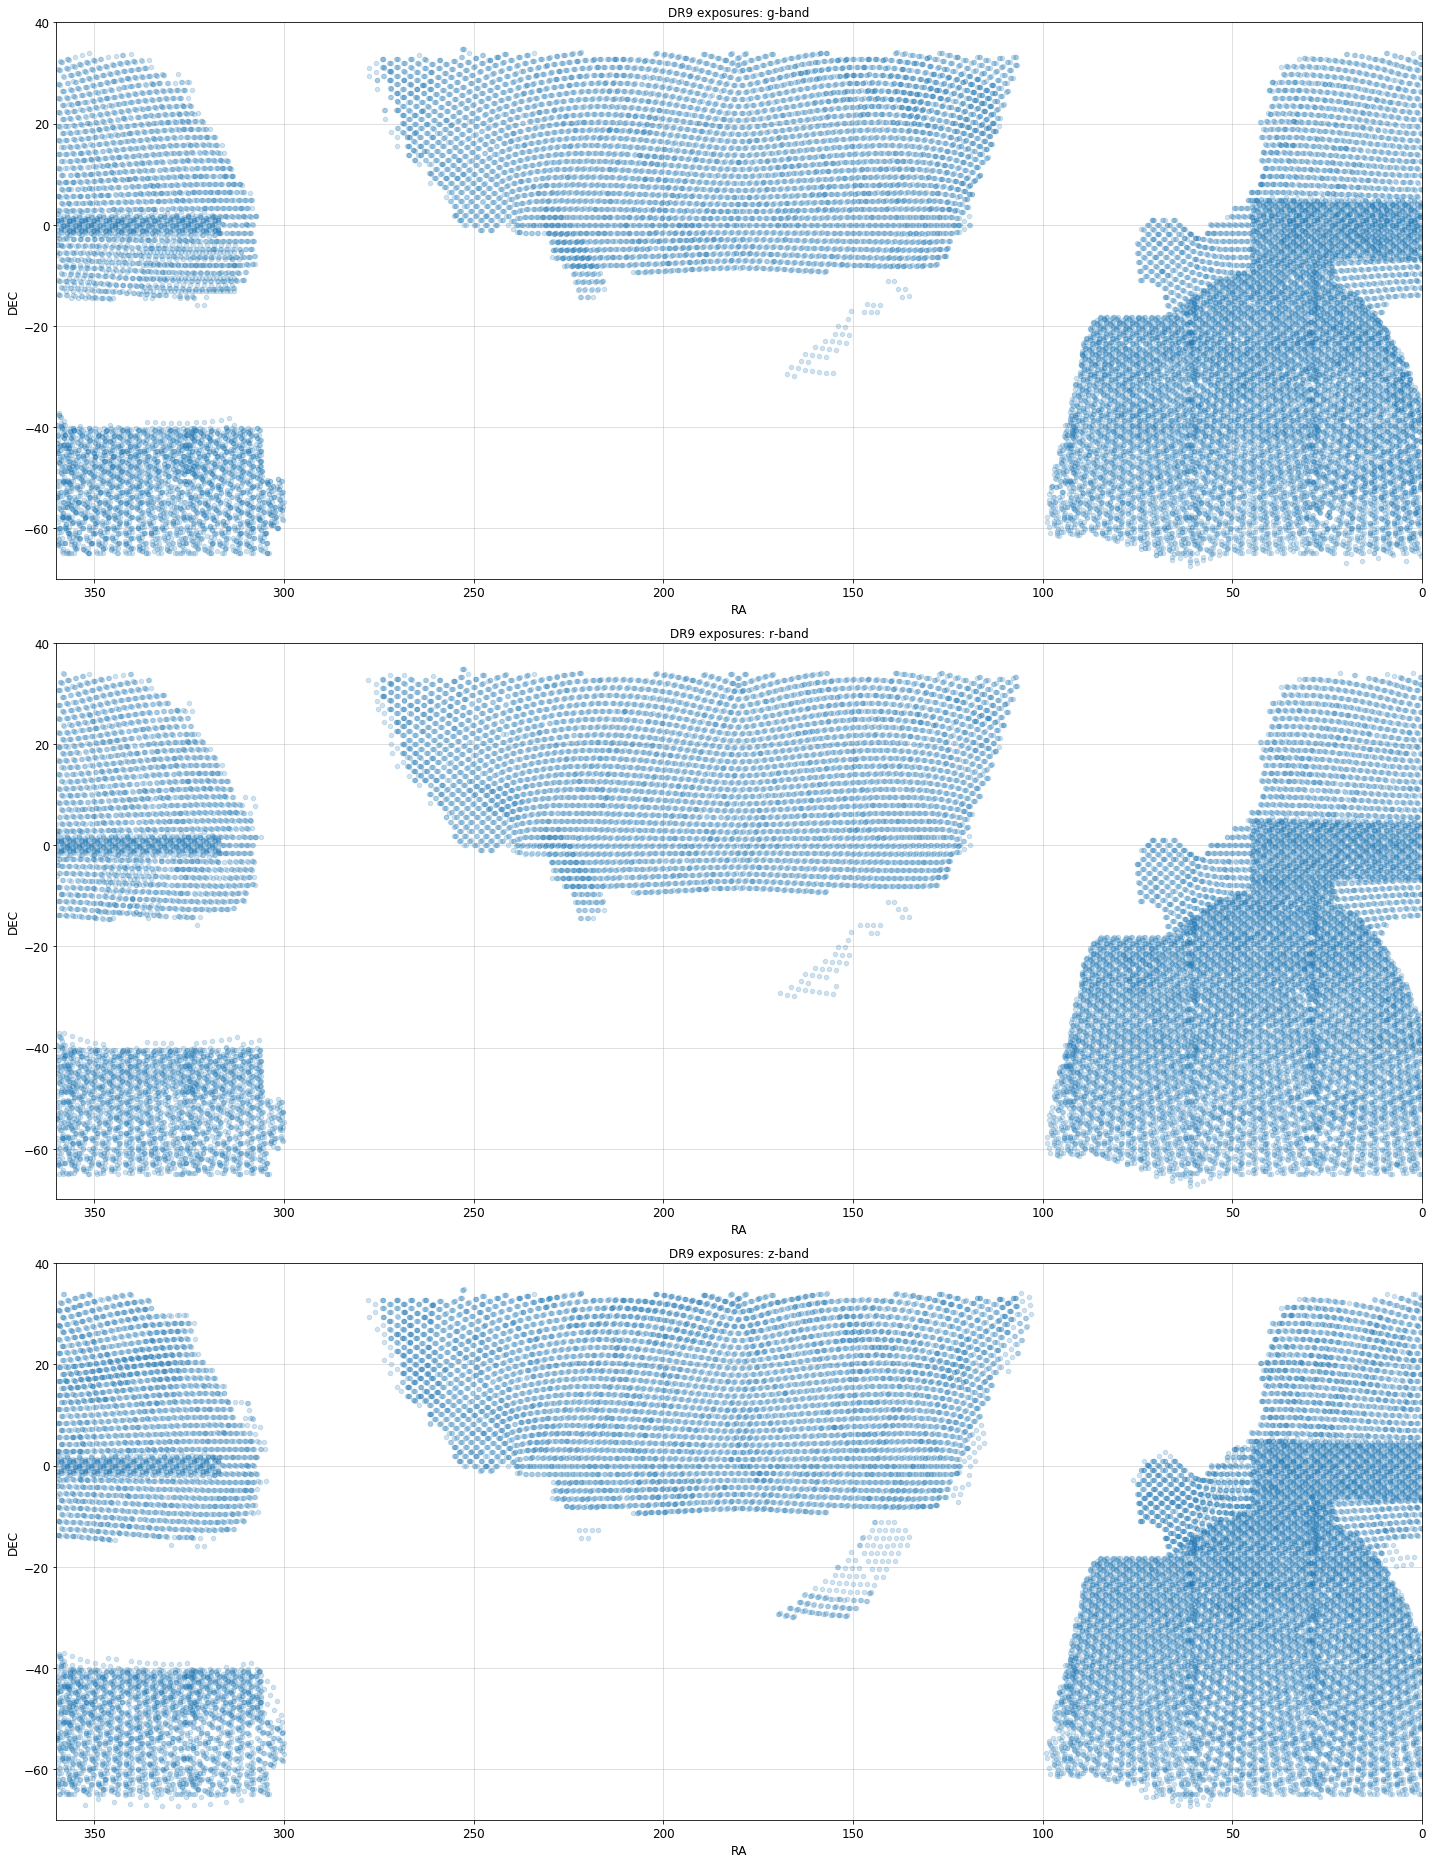

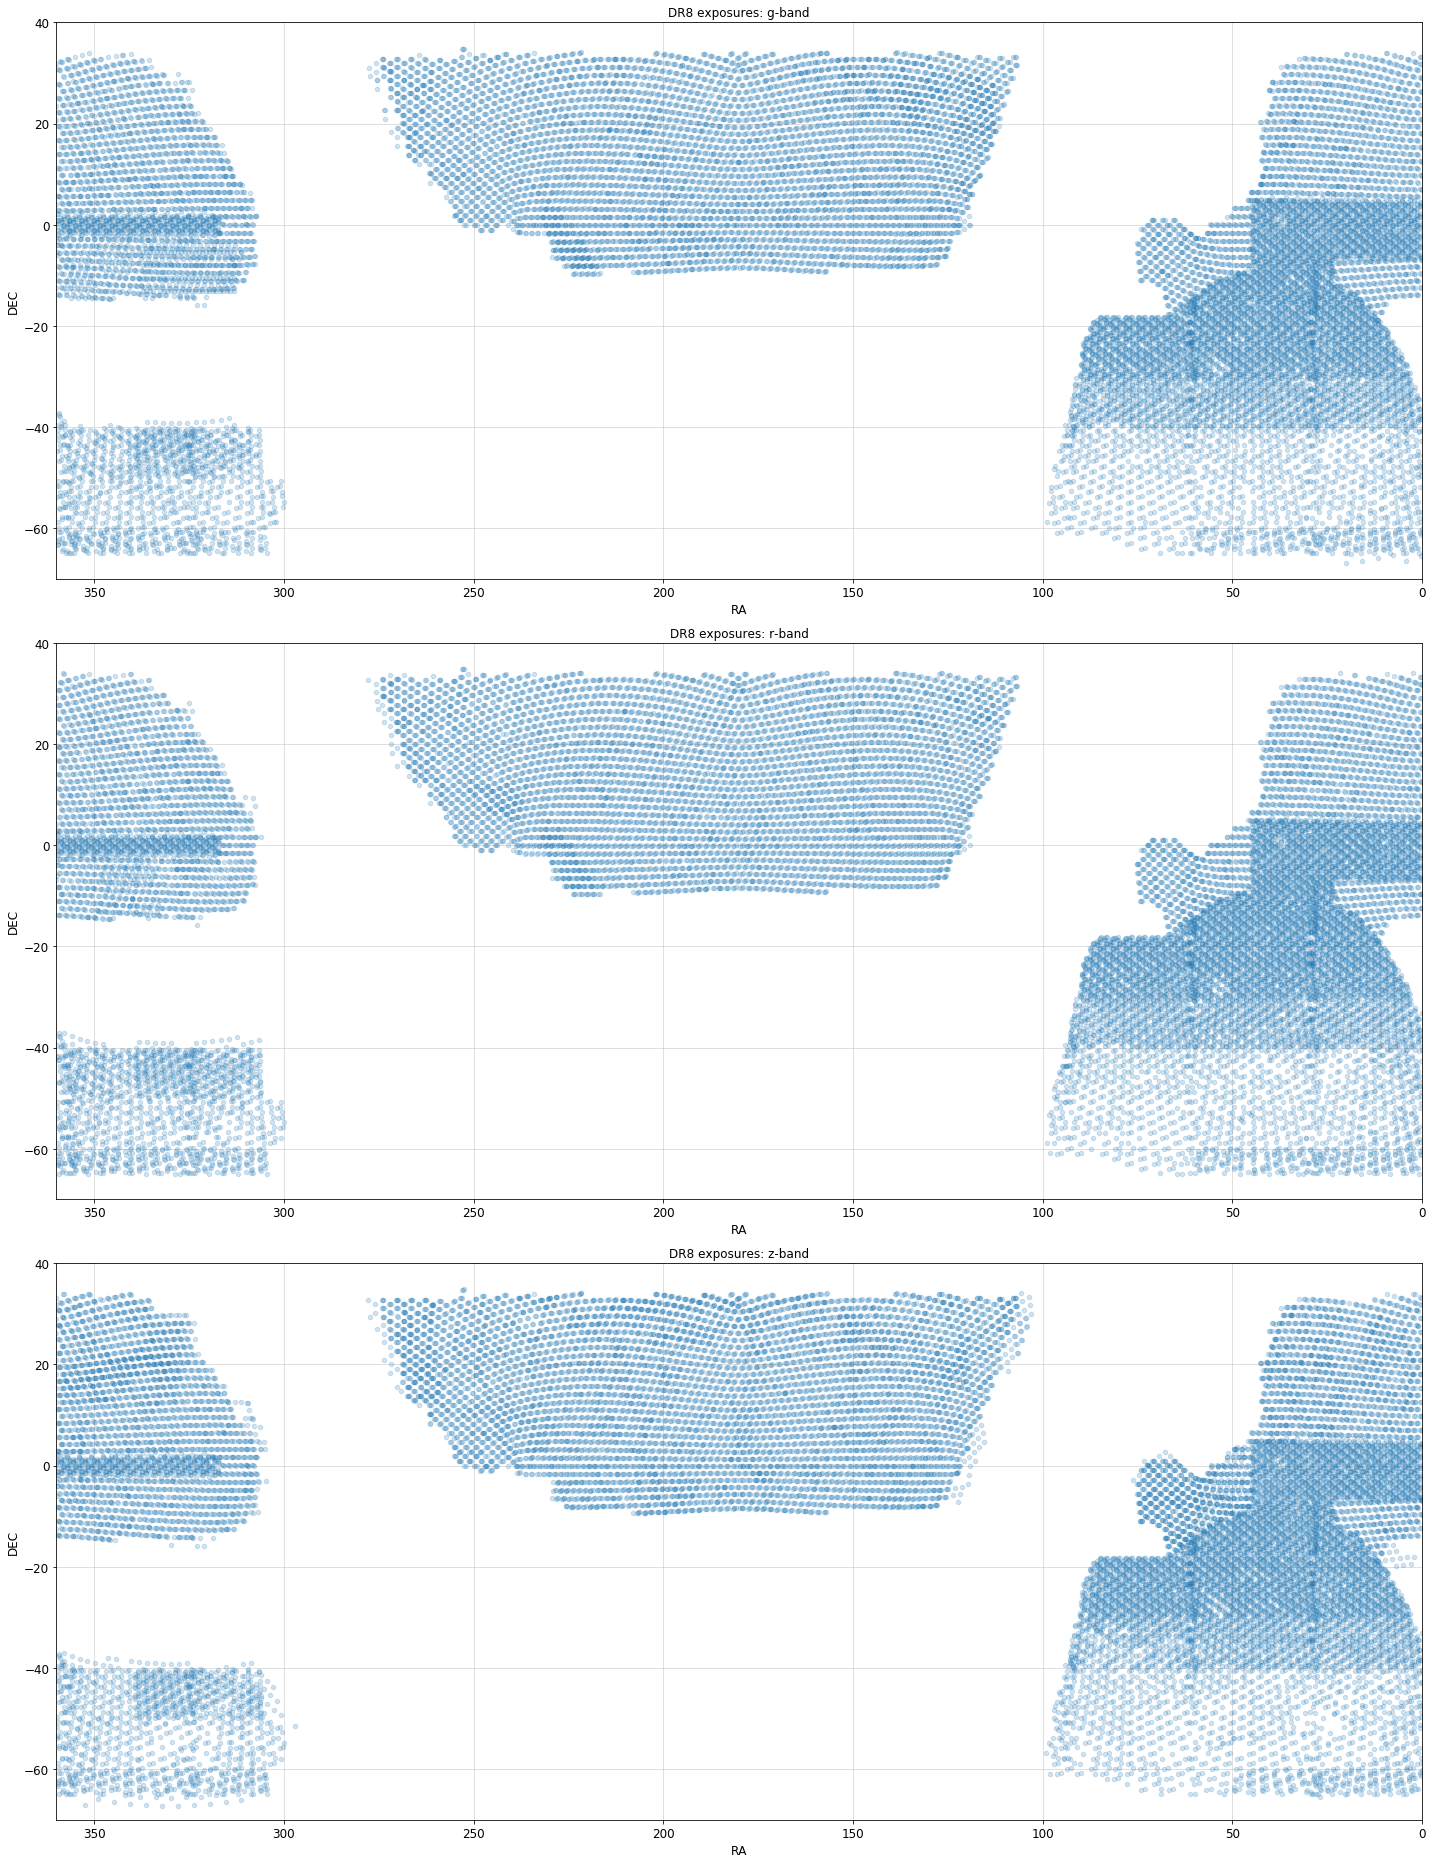

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(20, 26))
for index, band in enumerate(['g', 'r', 'z']):
    mask = dr9['filter']==band
    ax[index].plot(dr9['ra_bore'][mask], dr9['dec_bore'][mask], '.', ms=9, alpha=0.2)
    ax[index].set_title('DR9 exposures: {}-band'.format(band))
    ax[index].set_xlabel('RA')
    ax[index].set_ylabel('DEC')
    ax[index].axis([360, 0, -70, 40])
    ax[index].grid(alpha=0.5)
plt.tight_layout()
plt.savefig('plots/dr9-ccd_cuts.png')
plt.show()

fig, ax = plt.subplots(3, 1, figsize=(20, 26))
for index, band in enumerate(['g', 'r', 'z']):
    mask = dr8['filter']==band
    ax[index].plot(dr8['ra_bore'][mask], dr8['dec_bore'][mask], '.', ms=9, alpha=0.2)
    ax[index].set_title('DR8 exposures: {}-band'.format(band))
    ax[index].set_xlabel('RA')
    ax[index].set_ylabel('DEC')
    ax[index].axis([360, 0, -70, 40])
    ax[index].grid(alpha=0.5)
plt.tight_layout()
plt.savefig('plots/dr8-ccd_cuts.png')
plt.show()

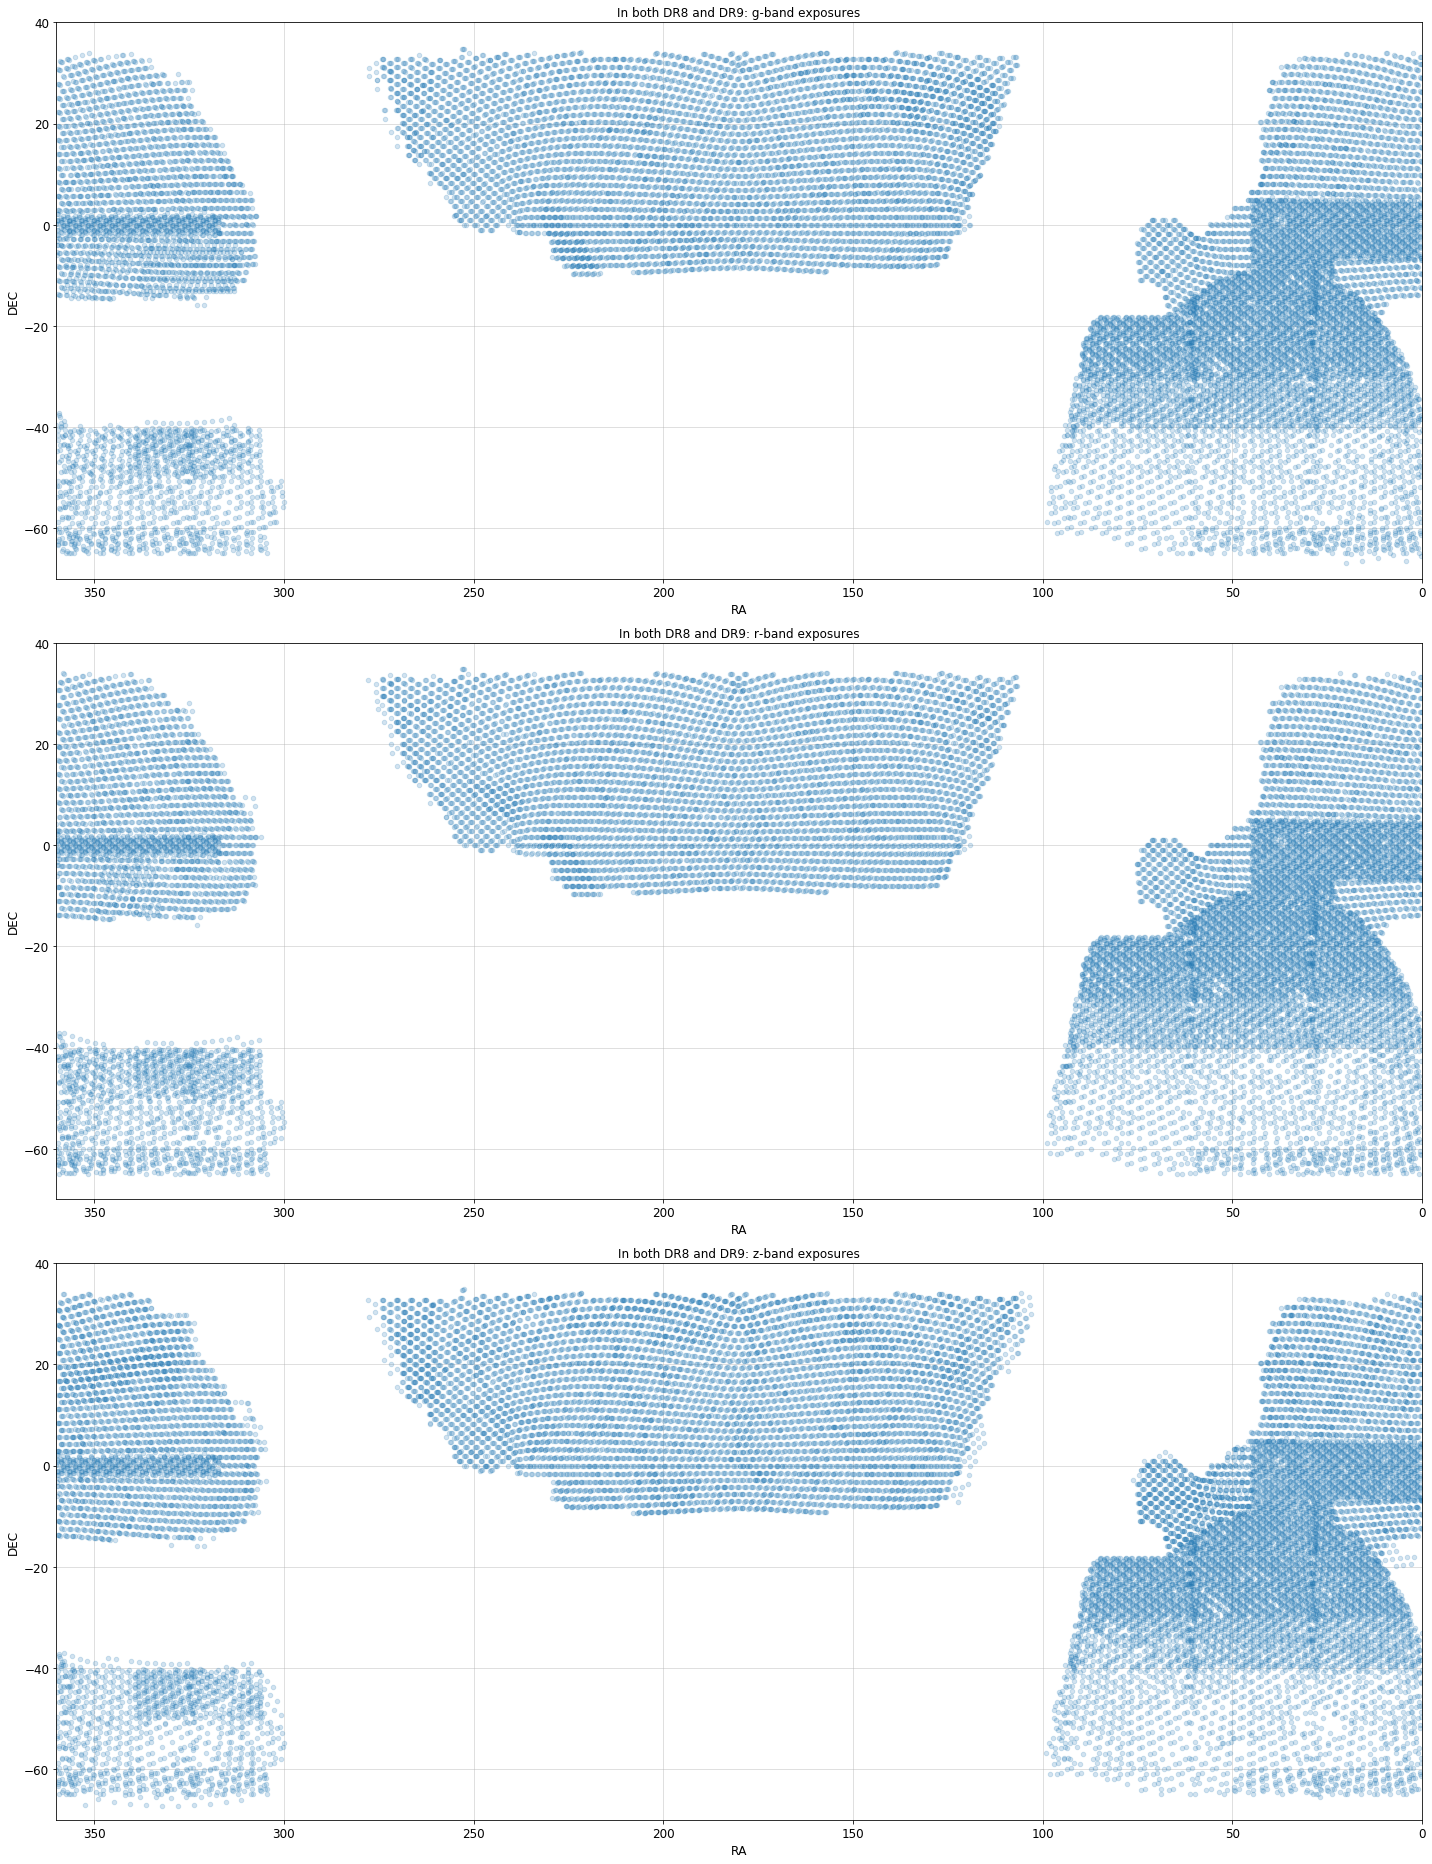

In [13]:
mask_all = np.in1d(dr9['expnum'], dr8['expnum'])
fig, ax = plt.subplots(3, 1, figsize=(20, 26))
for index, band in enumerate(['g', 'r', 'z']):
    mask = mask_all & (dr9['filter']==band)
    ax[index].plot(dr9['ra_bore'][mask], dr9['dec_bore'][mask], '.', ms=9, alpha=0.2)
    ax[index].set_title('In both DR8 and DR9: {}-band exposures'.format(band))
    ax[index].set_xlabel('RA')
    ax[index].set_ylabel('DEC')
    ax[index].axis([360, 0, -70, 40])
    ax[index].grid(alpha=0.5)
plt.tight_layout()
plt.savefig('plots/dr8_and_dr9-ccd_cuts.png')
plt.show()

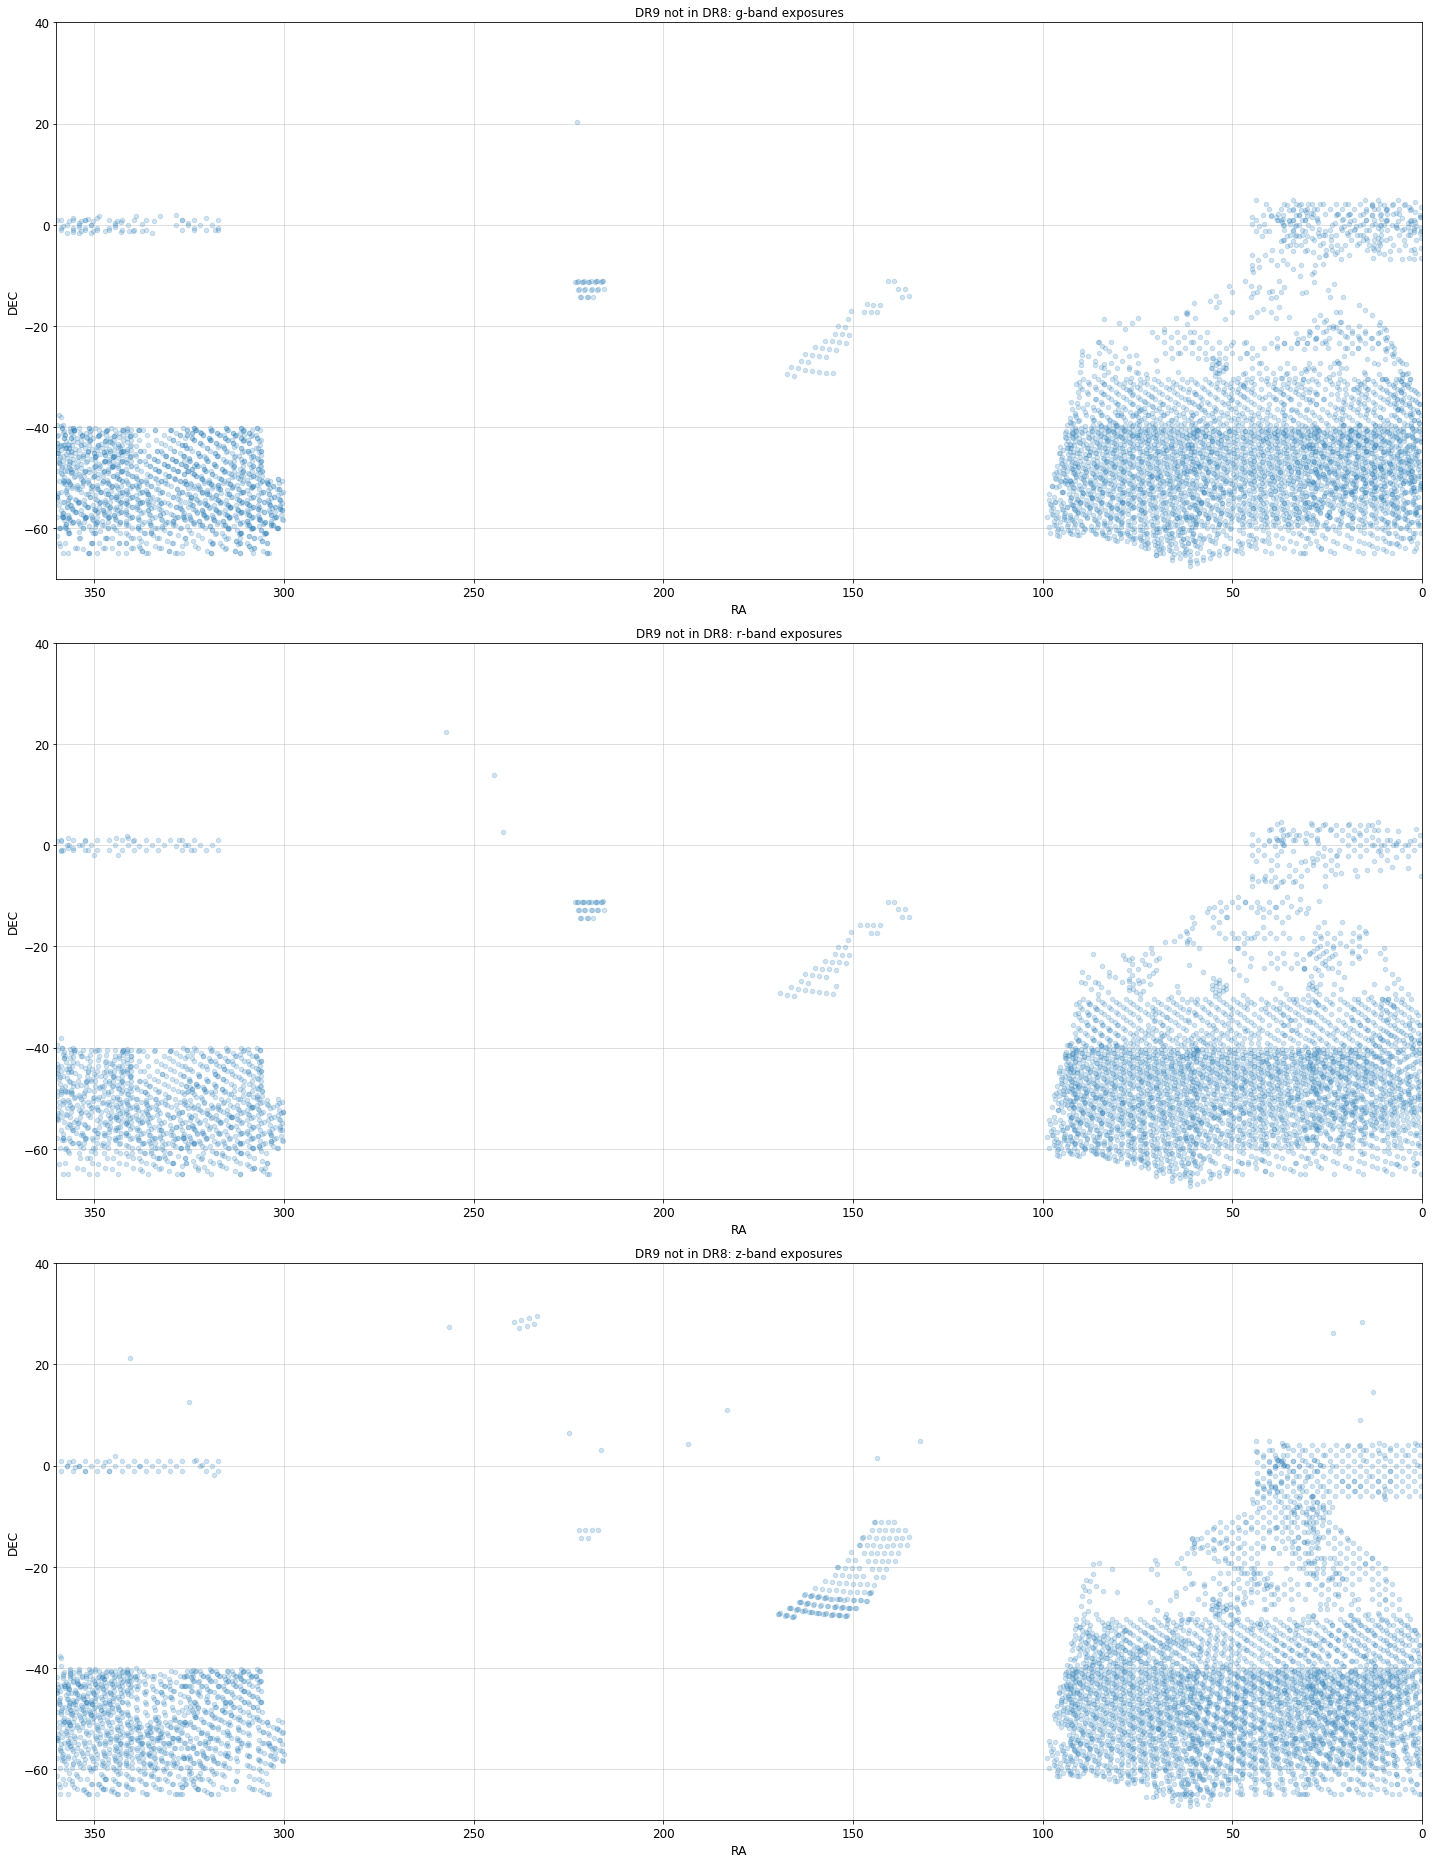

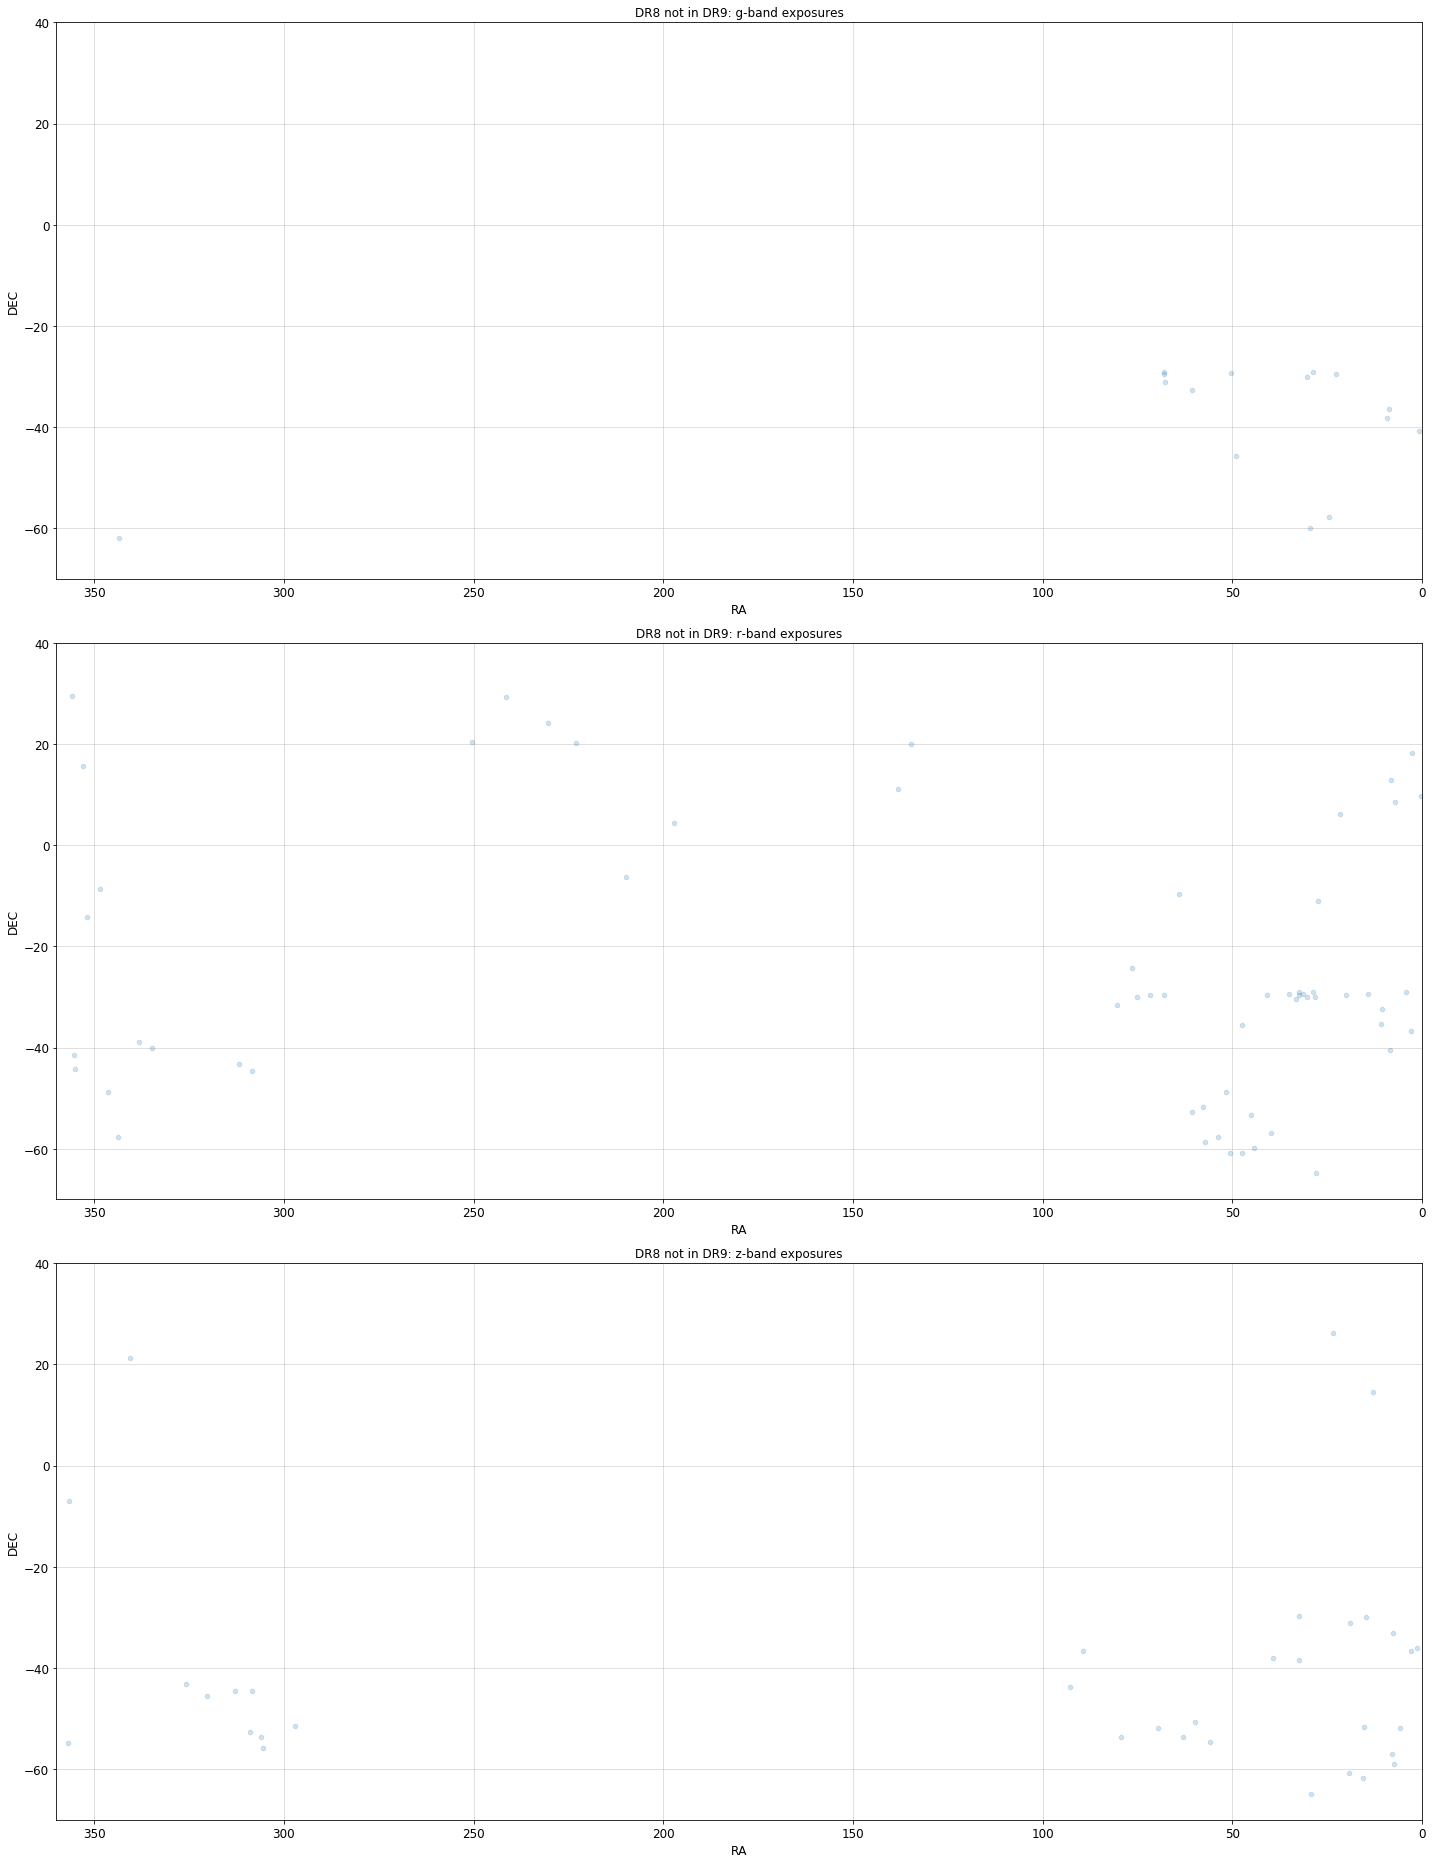

In [14]:
mask_all = ~np.in1d(dr9['expnum'], dr8['expnum'])
fig, ax = plt.subplots(3, 1, figsize=(20, 26))
for index, band in enumerate(['g', 'r', 'z']):
    mask = mask_all & (dr9['filter']==band)
    ax[index].plot(dr9['ra_bore'][mask], dr9['dec_bore'][mask], '.', ms=9, alpha=0.2)
    ax[index].set_title('DR9 not in DR8: {}-band exposures'.format(band))
    ax[index].set_xlabel('RA')
    ax[index].set_ylabel('DEC')
    ax[index].axis([360, 0, -70, 40])
    ax[index].grid(alpha=0.5)
plt.tight_layout()
plt.savefig('plots/dr9_not_in_dr8-ccd_cuts.png')
plt.show()

mask_all = ~np.in1d(dr8['expnum'], dr9['expnum'])
fig, ax = plt.subplots(3, 1, figsize=(20, 26))
for index, band in enumerate(['g', 'r', 'z']):
    mask = mask_all & (dr8['filter']==band)
    ax[index].plot(dr8['ra_bore'][mask], dr8['dec_bore'][mask], '.', ms=9, alpha=0.2)
    ax[index].set_title('DR8 not in DR9: {}-band exposures'.format(band))
    ax[index].set_xlabel('RA')
    ax[index].set_ylabel('DEC')
    ax[index].axis([360, 0, -70, 40])
    ax[index].grid(alpha=0.5)
plt.tight_layout()
plt.savefig('plots/dr8_not_in_dr9-ccd_cuts.png')
plt.show()